In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
vocab_size = 10000  # Vocabulary size
max_length = 200  # Maximum length of review
embedding_dim = 32  # Word embedding dimension
gru_units = 64  # Number of GRU units (controls model capacity)
batch_size = 32  # Batch size
num_epochs = 5  # Number of training epochs

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build the GRU model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Word embeddings
    GRU(gru_units, activation='tanh'),  # GRU layer (replaces SimpleRNN/LSTM)
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 62s 77ms/step - loss: 0.6902 - accuracy: 0.5241 - val_loss: 0.6064 - val_accuracy: 0.7000
Epoch 2/5
782/782 [==============================] - 61s 77ms/step - loss: 0.4589 - accuracy: 0.7807 - val_loss: 0.3261 - val_accuracy: 0.8612
Epoch 3/5
782/782 [==============================] - 59s 76ms/step - loss: 0.2336 - accuracy: 0.9090 - val_loss: 0.3226 - val_accuracy: 0.8656
Epoch 4/5
782/782 [==============================] - 55s 71ms/step - loss: 0.1625 - accuracy: 0.9416 - val_loss: 0.3688 - val_accuracy: 0.8534
Epoch 5/5
782/782 [==============================] - 56s 71ms/step - loss: 0.1124 - accuracy: 0.9634 - val_loss: 0.4347 - val_accuracy: 0.8486


782/782 [==============================] - 11s 14ms/step - loss: 0.4347 - accuracy: 0.8486
Test Accuracy: 0.8486


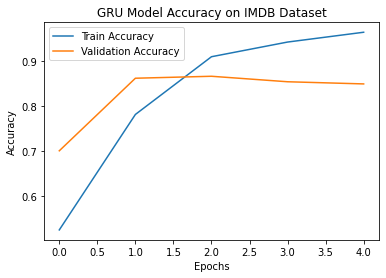

In [3]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GRU Model Accuracy on IMDB Dataset')
plt.show()


In [4]:
# Function to preprocess and predict sentiment
def predicted_sentiment(text, model):
    tokenizer = Tokenizer(num_words=vocab_size)
    sequence = tokenizer.texts_to_sequences([text])  # Convert text to sequence
    padding_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')  # Pad sequence
    prediction = model.predict(padding_sequence)[0][0]  # Get model prediction
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    print(f"Predicted Sentiment: {sentiment} (score: {prediction:.4f})")
    return sentiment

# Example usage
input_text = "This movie was very bad."
predicted_sentiment(input_text, model)

Predicted Sentiment: Positive (score: 0.8855)


'Positive'